## Imports

In [24]:
# To embed plots in the notebooks
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np # numpy library
import scipy . linalg as lng # linear algebra from scipy library
from scipy . spatial import distance # load distance function
from sklearn import preprocessing as preproc # load preprocessing function

# seaborn can be used to "prettify" default matplotlib plots by importing and setting as default
import seaborn as sns
sns.set() # Set searborn as default

## Load dataset

In [25]:
diabetPath = './DiabetesDataNormalized.txt'
T = np.loadtxt(diabetPath, delimiter = ' ', skiprows = 1)
y = T[:, 10]
X = T[:,:10]

# Get number of observations (n) and number of independent variables (p)
[n, p] = np.shape(X)

M = X

## 2 Examine Bias and Variance for the OLS:

> (a) Investigate the unbiasedness of OLS using simulated data as follows.

>> (i) Create a random matrix ${\bf X}$ consisting of three random variables which are NID, with $X ∼ N ({\bf 0}, {\bf I})$ and sample 10 observations from each.

>> (ii) Create the true regression parameters $β_{true} = [1, 2, 3]^T$.

>> (iii) Create the response y by the linear model ${\bf y} = {\bf X}β + {\bf ε}$. Make sure the errors ε are homoscedastic and zero-mean $ε ∼ N(0,σ^2)$, where $σ^2$ denotes the noise level in the simulated data.

>> (iv) Estimate the regression coefficients $β$ from this data

In [26]:
# Create a function that takes X and beta_true as parameters and returns an estimate of the betas by simulating observed variables
def estimate_betas(X, beta_true, sigma):
    """
    Parameters:
    X (nXp matrix): feature matrix used for simulation 
    true_betas (array): array of ture betas
    sigma (float): noise level

    Returns:
    beta: the estimated betas using OLS
    """
    # Simulate observed data using the created feature matrix
    epsilon = np.random.normal(0, sigma, size=X.shape[0])
    y = X @ beta_true + epsilon
    
    # Estimate beta using OLS formula: beta = (X'X)^(-1)X'y
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    
    return beta

# define true betas, n and p, and sigma
beta_true = np.array([1, 2, 3])
n = 10
p = 3
sigma = 0.1

# Create a feature matrix either using np.random.normal or np.rand.randn
X = np.random.normal(0, 1, size=(n, p))

beta = estimate_betas(X, beta_true, sigma)
print (f'Estimated betas:{beta}')

Estimated betas:[1.01027672 1.97578879 2.94708676]


>> (v) Repeat steps (iii)-(iv) 100 times.

In [27]:
sigma = 0.1 # noise level
m = 5000 # number of experiments

# call the method you just created 100 times and save the estimated betas
betas = []
for i in range(m):
    betas.append(estimate_betas(X, beta_true, sigma))

print(betas)

[array([1.06279399, 1.98715623, 3.03488314]), array([0.99386561, 1.94104741, 2.98990366]), array([1.01234068, 2.00468867, 2.97194763]), array([1.00399239, 1.98966822, 3.02364414]), array([0.99591288, 2.05858346, 3.00037593]), array([0.97831778, 2.03330127, 3.04370662]), array([0.98669436, 1.97103414, 3.00712727]), array([0.9657494 , 1.99893944, 2.9550829 ]), array([1.01771886, 1.99362278, 3.01585971]), array([1.06431717, 1.98287519, 3.04427908]), array([1.02548785, 2.00004206, 2.91491053]), array([0.98919928, 2.0318193 , 3.03010652]), array([1.00226669, 1.97995474, 3.05008322]), array([0.95800362, 1.97482125, 3.00943663]), array([0.97927922, 1.99788972, 2.97191407]), array([1.0913455 , 1.98431283, 3.01245871]), array([0.93867164, 2.00851806, 3.05110017]), array([1.00796056, 1.99862899, 2.99296462]), array([0.93214156, 2.02977674, 2.94119801]), array([1.02427673, 1.97084517, 3.05856797]), array([0.95953043, 1.96341733, 2.9705317 ]), array([0.96487885, 1.99117021, 2.92488076]), array([1.

>> (vi) Use meaningful plots to investigate bias and variance for the model. Experiment with different noise levels $σ^2$. 

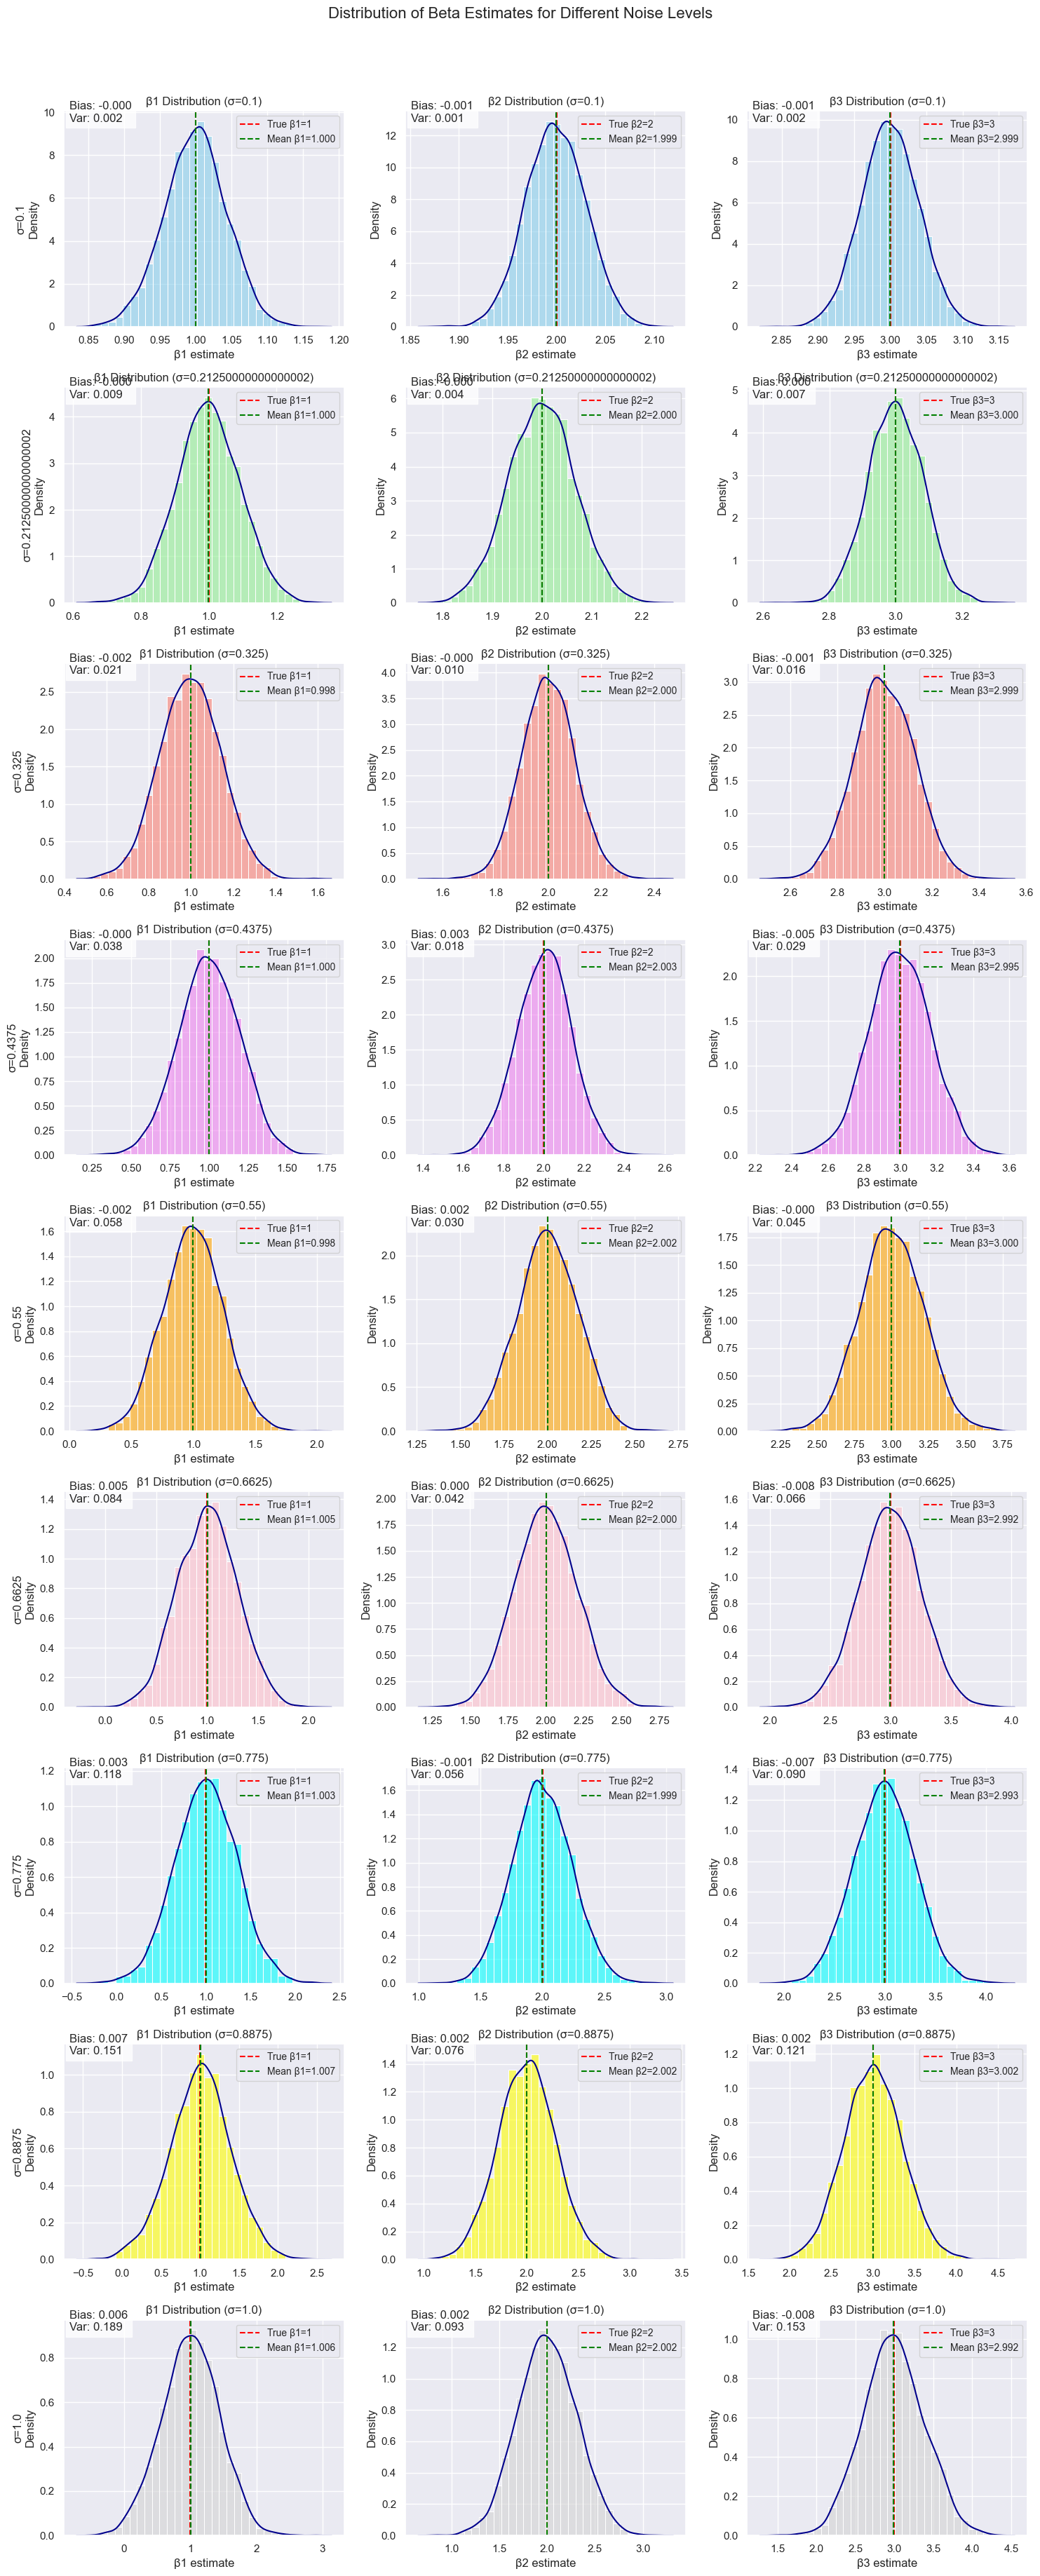


Summary Statistics:
--------------------------------------------------

Noise Level (σ) = 0.1
β1: Bias = -0.0003, Variance = 0.0019, MSE = 0.0019
β2: Bias = -0.0007, Variance = 0.0009, MSE = 0.0009
β3: Bias = -0.0005, Variance = 0.0016, MSE = 0.0016

Noise Level (σ) = 0.21250000000000002
β1: Bias = -0.0002, Variance = 0.0085, MSE = 0.0085
β2: Bias = -0.0003, Variance = 0.0043, MSE = 0.0043
β3: Bias = 0.0005, Variance = 0.0068, MSE = 0.0068

Noise Level (σ) = 0.325
β1: Bias = -0.0021, Variance = 0.0205, MSE = 0.0205
β2: Bias = -0.0004, Variance = 0.0101, MSE = 0.0101
β3: Bias = -0.0007, Variance = 0.0162, MSE = 0.0162

Noise Level (σ) = 0.4375
β1: Bias = -0.0001, Variance = 0.0377, MSE = 0.0377
β2: Bias = 0.0029, Variance = 0.0181, MSE = 0.0181
β3: Bias = -0.0047, Variance = 0.0287, MSE = 0.0288

Noise Level (σ) = 0.55
β1: Bias = -0.0020, Variance = 0.0576, MSE = 0.0576
β2: Bias = 0.0016, Variance = 0.0297, MSE = 0.0297
β3: Bias = -0.0002, Variance = 0.0454, MSE = 0.0454

Noise Level (

In [31]:
# Investigate the betas that you have estimated from experiments with different noise levels
# Let's try different noise levels
noise_levels = np.linspace(0.1, 1, 9)  # Creates 9 equally spaced values from 0.1 to 10
all_betas = []

# For each noise level, run the simulation
for sigma in noise_levels:
    betas = []
    for i in range(m):
        betas.append(estimate_betas(X, beta_true, sigma))
    all_betas.append(np.array(betas))

# Create a figure with subplots for each beta coefficient
fig, axes = plt.subplots(len(noise_levels), 3, figsize=(15, 4*len(noise_levels)))
fig.suptitle('Distribution of Beta Estimates for Different Noise Levels', fontsize=16, y=1.02)

# Colors for different noise levels
colors = ['skyblue', 'lightgreen', 'salmon', 'violet', 'orange', 'pink', 'cyan', 'yellow', 'lightgray', 'red']

# Plot for each noise level and beta coefficient
for i, sigma in enumerate(noise_levels):
    betas_array = all_betas[i]
    
    # Calculate mean and variance for each beta
    means = np.mean(betas_array, axis=0)
    variances = np.var(betas_array, axis=0)
    
    for j in range(3):
        ax = axes[i, j]
        
        # Create histogram with kernel density estimate
        sns.histplot(data=betas_array[:,j], bins=30, stat='density', alpha=0.6, color=colors[i], ax=ax)
        sns.kdeplot(data=betas_array[:,j], color='darkblue', ax=ax)
        
        # Add vertical lines for true beta and mean estimate
        ax.axvline(beta_true[j], color='red', linestyle='--', label=f'True β{j+1}={beta_true[j]}')
        ax.axvline(means[j], color='green', linestyle='--', label=f'Mean β{j+1}={means[j]:.3f}')
        
        # Add title and labels
        ax.set_title(f'β{j+1} Distribution (σ={sigma})')
        ax.set_xlabel(f'β{j+1} estimate')
        if j == 0:
            ax.set_ylabel(f'σ={sigma}\nDensity')
        
        # Add bias and variance information
        bias = means[j] - beta_true[j]
        ax.text(0.02, 0.95, f'Bias: {bias:.3f}\nVar: {variances[j]:.3f}', 
                transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.8))
        
        ax.legend(fontsize='small')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print("-" * 50)
for i, sigma in enumerate(noise_levels):
    print(f"\nNoise Level (σ) = {sigma}")
    betas_array = all_betas[i]
    means = np.mean(betas_array, axis=0)
    variances = np.var(betas_array, axis=0)
    biases = means - beta_true
    
    for j in range(3):
        print(f"β{j+1}: Bias = {biases[j]:.4f}, Variance = {variances[j]:.4f}, MSE = {(biases[j]**2 + variances[j]):.4f}")

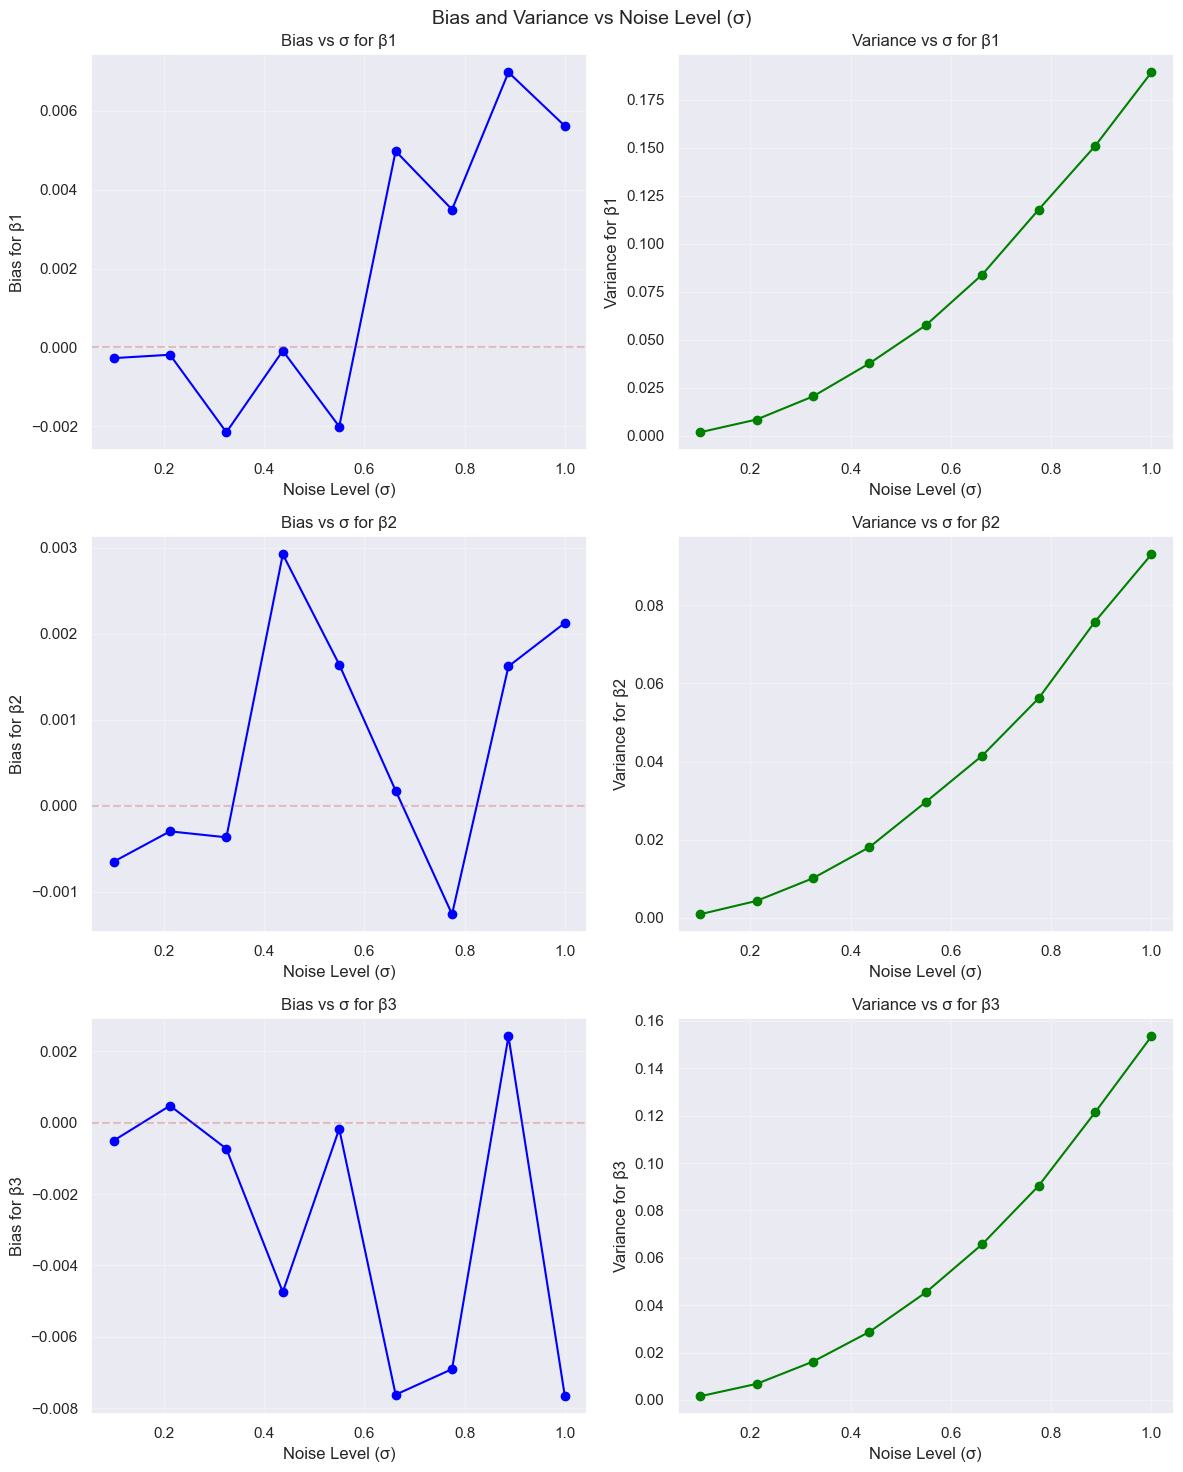

In [32]:
# Create figure for bias and variance plots
fig, axes = plt.subplots(3, 2, figsize=(12, 15))
fig.suptitle('Bias and Variance vs Noise Level (σ)', fontsize=14)

# For each beta coefficient
for j in range(3):
    # Calculate bias and variance for each noise level
    biases = []
    variances = []
    for i, sigma in enumerate(noise_levels):
        betas_array = all_betas[i]
        means = np.mean(betas_array, axis=0)
        vars = np.var(betas_array, axis=0)
        biases.append(means[j] - beta_true[j])
        variances.append(vars[j])
    
    # Plot bias
    axes[j,0].plot(noise_levels, biases, 'o-', color='blue')
    axes[j,0].axhline(y=0, color='r', linestyle='--', alpha=0.3)
    axes[j,0].set_xlabel('Noise Level (σ)')
    axes[j,0].set_ylabel(f'Bias for β{j+1}')
    axes[j,0].set_title(f'Bias vs σ for β{j+1}')
    axes[j,0].grid(True, alpha=0.3)
    
    # Plot variance
    axes[j,1].plot(noise_levels, variances, 'o-', color='green')
    axes[j,1].set_xlabel('Noise Level (σ)')
    axes[j,1].set_ylabel(f'Variance for β{j+1}')
    axes[j,1].set_title(f'Variance vs σ for β{j+1}')
    axes[j,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


What does bias and variance mean?

Are the parameter estimates unbiased? 

What happens when you change the noise level?